In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [93]:
#Se importa el dataset de estimaciones de la Provincia 

df = pd.read_csv("Estimaciones (Provincia de BsAs 1987-2022).csv", encoding='latin-1', sep=";")
df

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
0,Ajo,1987/88,BUENOS AIRES,ARRECIFES,6,77,10,10,35,3500
1,Ajo,1987/88,BUENOS AIRES,BAHIA BLANCA,6,56,10,10,30,3000
2,Ajo,1987/88,BUENOS AIRES,BALCARCE,6,63,258,258,910,3527
3,Ajo,1989/90,BUENOS AIRES,BALCARCE,6,63,50,50,250,5000
4,Ajo,1990/91,BUENOS AIRES,BALCARCE,6,63,80,80,400,5000
...,...,...,...,...,...,...,...,...,...,...
29214,Trigo total,2017/18,BUENOS AIRES,ZARATE,6,882,1950,1950,8385,4300
29215,Trigo total,2018/19,BUENOS AIRES,ZARATE,6,882,2800,2800,12320,4400
29216,Trigo total,2019/20,BUENOS AIRES,ZARATE,6,882,2500,2500,10000,4000
29217,Trigo total,2020/21,BUENOS AIRES,ZARATE,6,882,3000,3000,11700,3900


In [94]:
df['Rendimiento'].replace('SD', '0', inplace=True)

In [95]:
df.Rendimiento = df.Rendimiento.astype(float)

In [96]:
df['Sup. Cosechada'].replace('SD', '0', inplace=True)

In [97]:
df.rename(columns={"Sup. Sembrada":"Sup_Sembrada","Sup. Cosechada":"Sup_Cosechada"}, inplace=True)

In [98]:
df.Sup_Cosechada = df.Sup_Cosechada.astype(float)

In [99]:
df

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
0,Ajo,1987/88,BUENOS AIRES,ARRECIFES,6,77,10,10.0,35,3500.0
1,Ajo,1987/88,BUENOS AIRES,BAHIA BLANCA,6,56,10,10.0,30,3000.0
2,Ajo,1987/88,BUENOS AIRES,BALCARCE,6,63,258,258.0,910,3527.0
3,Ajo,1989/90,BUENOS AIRES,BALCARCE,6,63,50,50.0,250,5000.0
4,Ajo,1990/91,BUENOS AIRES,BALCARCE,6,63,80,80.0,400,5000.0
...,...,...,...,...,...,...,...,...,...,...
29214,Trigo total,2017/18,BUENOS AIRES,ZARATE,6,882,1950,1950.0,8385,4300.0
29215,Trigo total,2018/19,BUENOS AIRES,ZARATE,6,882,2800,2800.0,12320,4400.0
29216,Trigo total,2019/20,BUENOS AIRES,ZARATE,6,882,2500,2500.0,10000,4000.0
29217,Trigo total,2020/21,BUENOS AIRES,ZARATE,6,882,3000,3000.0,11700,3900.0


In [13]:
#Creamos un Dataframe solo del Girasol para realizar observaciones sobre este cultivo
Girasol = df.loc[:, 'Cultivo'] == 'Girasol'
df_G=df.loc[Girasol]
df_G
Gira = df_G

In [14]:
Gira

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
8174,Girasol,1987/88,BUENOS AIRES,25 DE MAYO,6,854,30000,30000.0,36000,1200.0
8175,Girasol,1988/89,BUENOS AIRES,25 DE MAYO,6,854,20000,19600.0,27500,1403.0
8176,Girasol,1989/90,BUENOS AIRES,25 DE MAYO,6,854,27500,27500.0,44000,1600.0
8177,Girasol,1990/91,BUENOS AIRES,25 DE MAYO,6,854,26000,26000.0,44200,1700.0
8178,Girasol,1991/92,BUENOS AIRES,25 DE MAYO,6,854,27500,25500.0,33200,1302.0
...,...,...,...,...,...,...,...,...,...,...
11328,Girasol,2011/12,BUENOS AIRES,ZARATE,6,882,1050,1050.0,1890,1800.0
11329,Girasol,2012/13,BUENOS AIRES,ZARATE,6,882,950,950.0,2470,2600.0
11330,Girasol,2013/14,BUENOS AIRES,ZARATE,6,882,650,650.0,1760,2708.0
11331,Girasol,2014/15,BUENOS AIRES,ZARATE,6,882,450,450.0,1215,2700.0


In [15]:
#Se eligen las zonas mas cercanas a Junin que hayan cultivado girasol y se arma un DF
Gi = Gira[Gira.Departamento.isin(["SALTO", "CHACABUCO","ARENALES","ROJAS","LEANDRO N. ALEM","LINCOLN","JUNIN"])]
Gi

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
8897,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
8898,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
8899,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0
8900,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0
8901,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0
...,...,...,...,...,...,...,...,...,...,...
10858,Girasol,2015/16,BUENOS AIRES,SALTO,6,714,50,50.0,145,2900.0
10859,Girasol,2018/19,BUENOS AIRES,SALTO,6,714,590,590.0,1652,2800.0
10860,Girasol,2019/20,BUENOS AIRES,SALTO,6,714,350,350.0,1120,3200.0
10861,Girasol,2020/21,BUENOS AIRES,SALTO,6,714,200,200.0,600,3000.0


In [6]:
#Se carga el dataframe con las precipitaciones mensuales totales
precipitacion = pd.read_excel("precipitacion_mensual.xlsx")
precipitacion

,fecha,precipitacion
0,1988-01-31,56.2
1,1988-02-29,32.9
2,1988-03-31,283.0
3,1988-04-30,54.7
4,1988-05-31,0.5
...,...,...
319,2014-08-31,7.0
320,2014-09-30,89.5
321,2014-10-31,140.1
322,2014-11-30,231.0


In [20]:
#se tomo el DF de las precipitaciones y se los filtro por mes
##filtered_df = precipitacion.loc[precipitacion['fecha'].dt.month == 9]
##filtered_df

In [19]:
precip=precipitacion.groupby(pd.PeriodIndex(precipitacion.fecha, freq="Y"))
print(precip)

In [22]:
fechames= lambda x: x[:7]
precipitacion["fechames"]= precipitacion["fecha"].astype(str).map(fechames)
precipitacion

,fecha,precipitacion,fechames
0,1988-01-31,56.2,1988-01
1,1988-02-29,32.9,1988-02
2,1988-03-31,283.0,1988-03
3,1988-04-30,54.7,1988-04
4,1988-05-31,0.5,1988-05
...,...,...,...
319,2014-08-31,7.0,2014-08
320,2014-09-30,89.5,2014-09
321,2014-10-31,140.1,2014-10
322,2014-11-30,231.0,2014-11


In [30]:
#probamos la funcion replace para cambiar la fecha pero hay que hacerlo 1 a 1 en los 324 registros y no se me ocurre como
#agruparlos para hacerlo mas dinamico y facil

precipitacion['campaña'] = precipitacion['fechames'].replace(['1988-01'],'1988/89')
precipitacion.sample(50)


,fecha,precipitacion,fechames,fechames2,campaña
207,2005-04-30,44.0,2005-04,2005-04,2005-04
10,1988-11-30,36.0,1988-11,1988-11,1988-11
161,2001-06-30,17.7,2001-06,2001-06,2001-06
134,1999-03-31,169.3,1999-03,1999-03,1999-03
15,1989-04-30,79.0,1989-04,1989-04,1989-04
128,1998-09-30,21.3,1998-09,1998-09,1998-09
163,2001-08-31,135.0,2001-08,2001-08,2001-08
215,2005-12-31,45.9,2005-12,2005-12,2005-12
8,1988-09-30,68.4,1988-09,1988-09,1988-09
119,1997-12-31,202.4,1997-12,1997-12,1997-12


In [31]:
precipitacion.to_excel("precipitacion.xlsx")

In [59]:
precipitacion_camp = pd.read_excel("precipitacion_camp.xlsx")

In [60]:
precipitacion_camp

,fecha,precipitacion,campaña,mes
0,1988-01-31,56.2,1987/88,enero
1,1988-02-29,32.9,1987/88,febrero
2,1988-03-31,283.0,1987/88,marzo
3,1988-04-30,54.7,1987/88,abril
4,1988-05-31,0.5,1987/88,mayo
...,...,...,...,...
319,2014-08-31,7.0,2014/15,agosto
320,2014-09-30,89.5,2014/15,septiembre
321,2014-10-31,140.1,2014/15,octubre
322,2014-11-30,231.0,2014/15,noviembre


In [62]:
#cambiamos el index y ponemos la fecha
precipitacion_campa= precipitacion_camp.set_index('fecha')
precipitacion_campa.sample(30)

,precipitacion,campaña,mes
fecha,,,
2008-11-30,63.3,2008/09,noviembre
2010-09-30,119.0,2010/11,septiembre
1995-11-30,55.7,1995/96,noviembre
1996-07-31,12.2,1995/96,julio
1998-10-31,65.8,1998/99,octubre
1998-06-30,3.3,1997/98,junio
2006-11-30,67.0,2006/07,noviembre
2002-05-31,118.6,2001/02,mayo
2010-01-31,162.0,2009/10,enero


In [57]:
precipitacion_mes= precipitacion_camp.pivot(columns="mes")
precipitacion_mes

precipitacion                                                    \
mes                abril agosto diciembre enero febrero julio junio  marzo   
fecha                                                                        
1988-01-31           NaN    NaN       NaN  56.2     NaN   NaN   NaN    NaN   
1988-02-29           NaN    NaN       NaN   NaN    32.9   NaN   NaN    NaN   
1988-03-31           NaN    NaN       NaN   NaN     NaN   NaN   NaN  283.0   
1988-04-30          54.7    NaN       NaN   NaN     NaN   NaN   NaN    NaN   
1988-05-31           NaN    NaN       NaN   NaN     NaN   NaN   NaN    NaN   
...                  ...    ...       ...   ...     ...   ...   ...    ...   
2014-08-31           NaN    7.0       NaN   NaN     NaN   NaN   NaN    NaN   
2014-09-30           NaN    NaN       NaN   NaN     NaN   NaN   NaN    NaN   
2014-10-31           NaN    NaN       NaN   NaN     NaN   NaN   NaN    NaN   
2014-11-30           NaN    NaN       NaN   NaN     NaN   NaN   NaN    NaN   
2014-12-31           NaN    NaN     157.0   NaN     NaN   NaN   NaN    NaN   

                           ...   campaña                                \
mes        mayo noviembre  ... diciembre    enero  febrero julio junio   
fecha                      ...                                           
1988-01-31  NaN       NaN  ...       NaN  1987/88      NaN   NaN   NaN   
1988-02-29  NaN       NaN  ...       NaN      NaN  1987/88   NaN   NaN   
1988-03-31  NaN       NaN  ...       NaN      NaN      NaN   NaN   NaN   
1988-04-30  NaN       NaN  ...       NaN      NaN      NaN   NaN   NaN   
1988-05-31  0.5       NaN  ...       NaN      NaN      NaN   NaN   NaN   
...         ...       ...  ...       ...      ...      ...   ...   ...   
2014-08-31  NaN       NaN  ...       NaN      NaN      NaN   NaN   NaN   
2014-09-30  NaN       NaN  ...       NaN      NaN      NaN   NaN   NaN   
2014-10-31  NaN       NaN  ...       NaN      NaN      NaN   NaN   NaN   
2014-11-30  NaN     231.0  ...       NaN      NaN      NaN   NaN   NaN   
2014-12-31  NaN       NaN  ...   2014/15      NaN      NaN   NaN   NaN   

                                                            
mes           marzo     mayo noviembre  octubre septiembre  
fecha                                                       
1988-01-31      NaN      NaN       NaN      NaN        NaN  
1988-02-29      NaN      NaN       NaN      NaN        NaN  
1988-03-31  1987/88      NaN       NaN      NaN        NaN  
1988-04-30      NaN      NaN       NaN      NaN        NaN  
1988-05-31      NaN  1987/88       NaN      NaN        NaN  
...             ...      ...       ...      ...        ...  
2014-08-31      NaN      NaN       NaN      NaN        NaN  
2014-09-30      NaN      NaN       NaN      NaN    2014/15  
2014-10-31      NaN      NaN       NaN  2014/15        NaN  
2014-11-30      NaN      NaN   2014/15      NaN        NaN  
2014-12-31      NaN      NaN       NaN      NaN        NaN  

[324 rows x 24 columns]

In [64]:
precipitacion_campa = pd.read_excel("precipitacion_campa.xlsx")
precipitacion_campa

,precipitacion,campaña,mes
0,56.2,1987/88,enero
1,32.9,1987/88,febrero
2,283.0,1987/88,marzo
3,54.7,1987/88,abril
4,0.5,1987/88,mayo
...,...,...,...
319,7.0,2014/15,agosto
320,89.5,2014/15,septiembre
321,140.1,2014/15,octubre
322,231.0,2014/15,noviembre


In [74]:
precipitacion_campa.rename(columns={'campaña':'Campaña'},
               inplace=True)
precipitacion_campa

,precipitacion,Campaña,mes
0,56.2,1987/88,enero
1,32.9,1987/88,febrero
2,283.0,1987/88,marzo
3,54.7,1987/88,abril
4,0.5,1987/88,mayo
...,...,...,...
319,7.0,2014/15,agosto
320,89.5,2014/15,septiembre
321,140.1,2014/15,octubre
322,231.0,2014/15,noviembre


In [116]:
df_conprep2=pd.merge(precipitacion_campa, df , on='Campaña', how="outer")

In [117]:
df_conprep2


,precipitacion,Campaña,mes,Cultivo,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
0,56.2,1987/88,enero,Ajo,BUENOS AIRES,ARRECIFES,6,77,10,10.0,35,3500.0
1,56.2,1987/88,enero,Ajo,BUENOS AIRES,BAHIA BLANCA,6,56,10,10.0,30,3000.0
2,56.2,1987/88,enero,Ajo,BUENOS AIRES,BALCARCE,6,63,258,258.0,910,3527.0
3,56.2,1987/88,enero,Ajo,BUENOS AIRES,GENERAL PUEYRREDON,6,357,3,3.0,10,3333.0
4,56.2,1987/88,enero,Ajo,BUENOS AIRES,GENERAL RODRIGUEZ,6,364,3,3.0,10,3333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263841,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,TRENQUE LAUQUEN,6,826,42000,40800.0,106080,2600.0
263842,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,TRES ARROYOS,6,833,119000,119000.0,393100,3303.0
263843,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,TRES LOMAS,6,847,9100,8400.0,20980,2498.0
263844,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,VILLARINO,6,875,15000,13200.0,10790,817.0


In [118]:
df_conprep2.to_csv("df_conprep2.csv")

In [103]:
df_conprep['Rendimiento'].replace('SD', '0', inplace=True)

In [105]:
df_conprep.Rendimiento = df.Rendimiento.astype(float)

In [108]:
df_conprep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256963 entries, 0 to 256962
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Cultivo         256963 non-null  object 
 1   Campaña         256963 non-null  object 
 2   Provincia       256963 non-null  object 
 3   Departamento    256963 non-null  object 
 4   idProvincia     256963 non-null  int64  
 5   idDepartamento  256963 non-null  int64  
 6   Sup_Sembrada    256963 non-null  int64  
 7   Sup_Cosechada   256963 non-null  float64
 8   Producción      256963 non-null  object 
 9   Rendimiento     29219 non-null   float64
 10  precipitacion   256963 non-null  float64
 11  mes             256963 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 25.5+ MB


In [119]:
df_localidad = df_conprep2[df_conprep2.Departamento.isin(["SALTO", "CHACABUCO","ARENALES","ROJAS","LEANDRO N. ALEM","LINCOLN","JUNIN"])]
df_localidad

,precipitacion,Campaña,mes,Cultivo,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
29,56.2,1987/88,enero,Alpiste,BUENOS AIRES,LEANDRO N. ALEM,6,462,50,50.0,50,1000.0
30,56.2,1987/88,enero,Alpiste,BUENOS AIRES,LINCOLN,6,469,170,160.0,190,1188.0
39,56.2,1987/88,enero,Alpiste,BUENOS AIRES,ROJAS,6,686,400,400.0,480,1200.0
70,56.2,1987/88,enero,Avena,BUENOS AIRES,CHACABUCO,6,210,2200,0.0,0,0.0
100,56.2,1987/88,enero,Avena,BUENOS AIRES,JUNIN,6,413,3500,300.0,600,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263796,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,JUNIN,6,413,32000,32000.0,134400,4200.0
263800,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,LEANDRO N. ALEM,6,462,28000,27200.0,103360,3800.0
263801,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,LINCOLN,6,469,51000,49325.0,180036,3650.0
263825,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,ROJAS,6,686,30000,29750.0,130900,4400.0


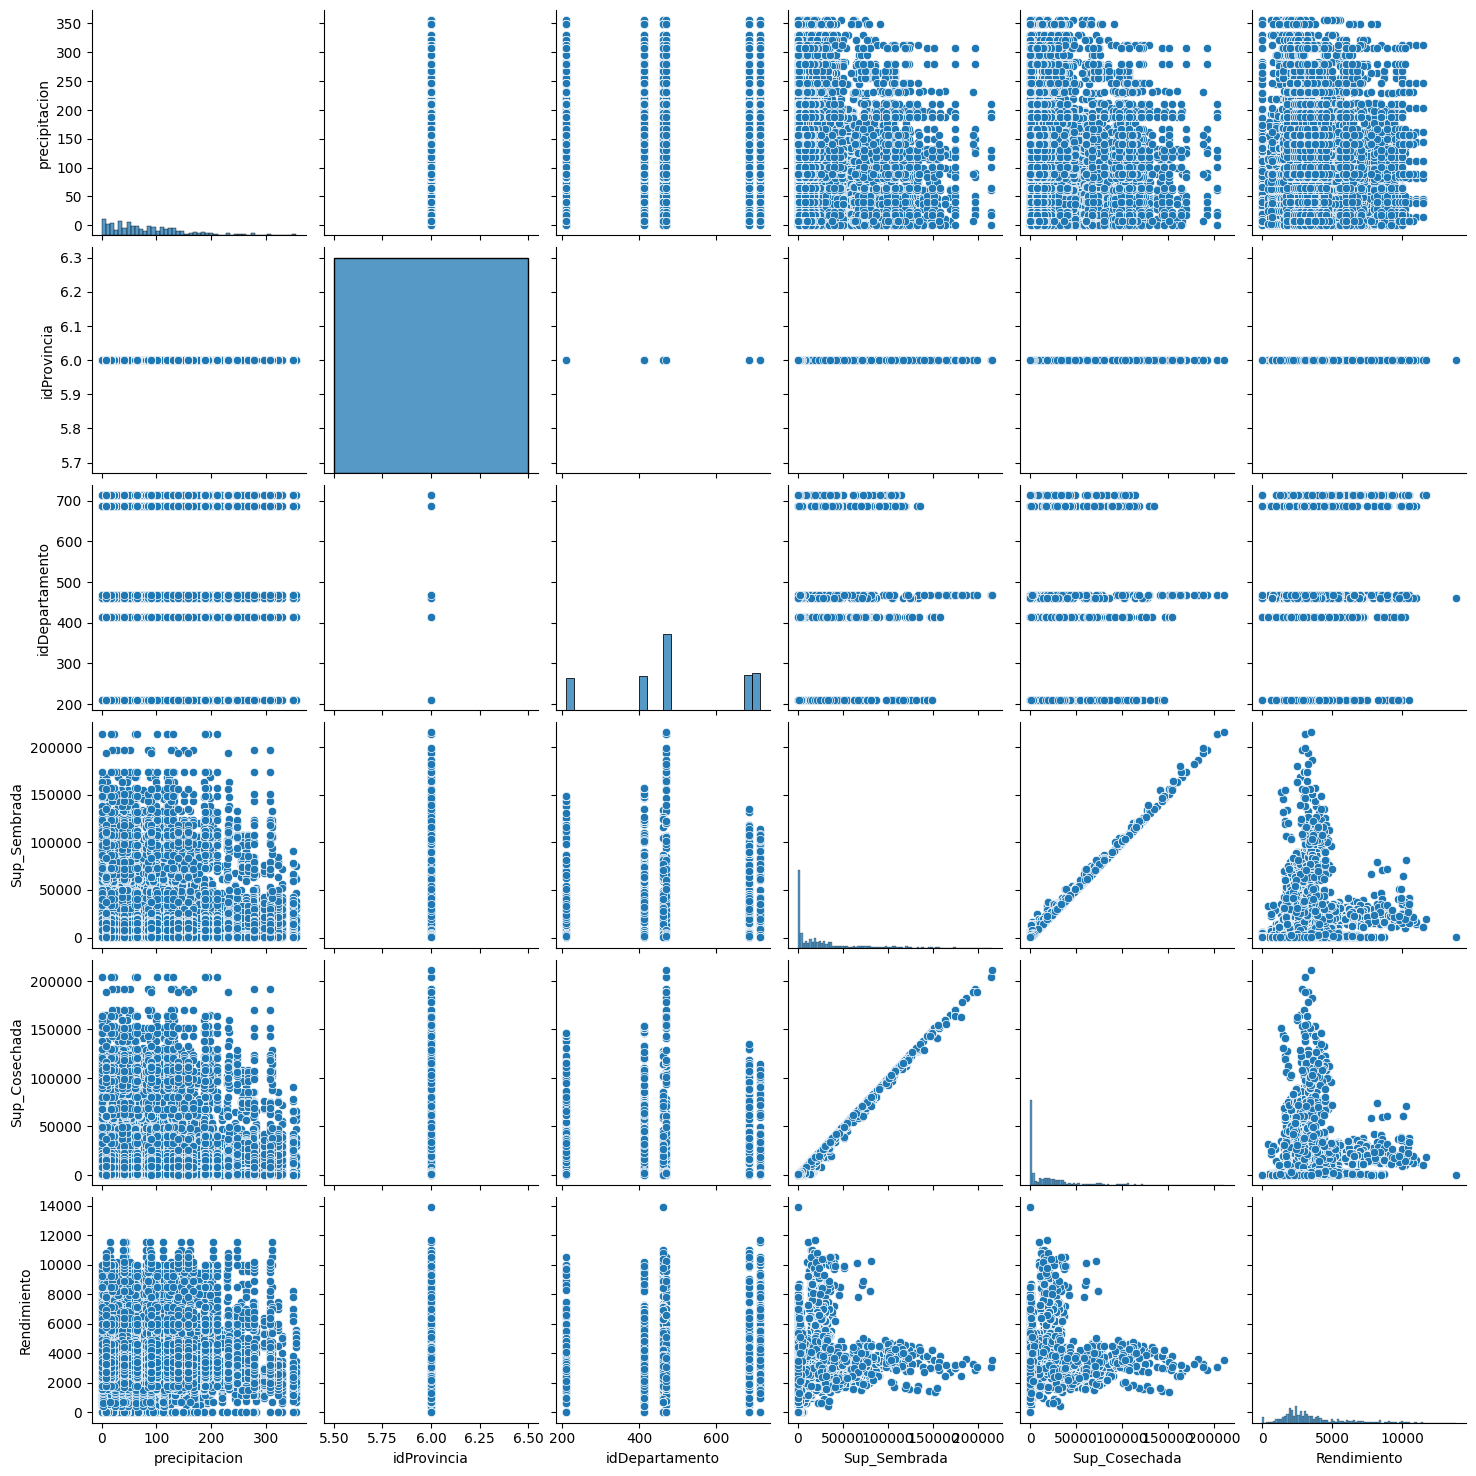

In [120]:
sns.pairplot(df_localidad)

In [112]:
df_localidad.corr()

,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Rendimiento,precipitacion
idProvincia,NaN,NaN,NaN,NaN,NaN,NaN
idDepartamento,NaN,1.000000,-0.054914,-0.050675,0.044156,-0.001655
Sup_Sembrada,NaN,-0.054914,1.000000,0.998302,0.040175,0.005259
Sup_Cosechada,NaN,-0.050675,0.998302,1.000000,0.030090,0.004183
Rendimiento,NaN,0.044156,0.040175,0.030090,1.000000,0.020902
precipitacion,NaN,-0.001655,0.005259,0.004183,0.020902,1.000000


<AxesSubplot:>

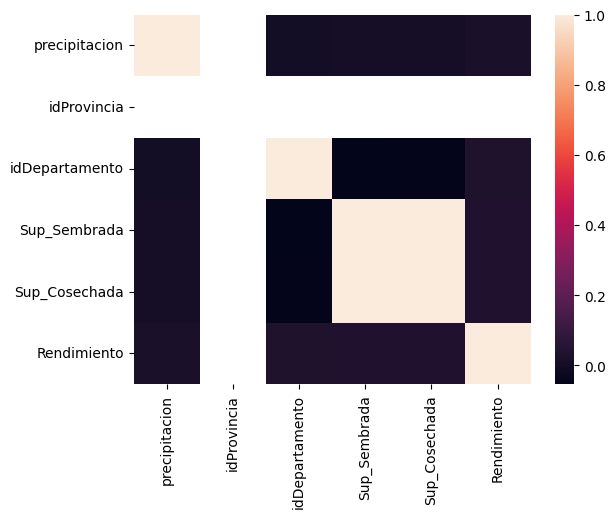

In [121]:
sns.heatmap(df_localidad.corr())

In [131]:

del(df_localidad['Departamento'])
df_localidad

,precipitacion,Campaña,mes,Cultivo,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
29,56.2,1987/88,enero,Alpiste,6,462,50,50.0,50,1000.0
30,56.2,1987/88,enero,Alpiste,6,469,170,160.0,190,1188.0
39,56.2,1987/88,enero,Alpiste,6,686,400,400.0,480,1200.0
70,56.2,1987/88,enero,Avena,6,210,2200,0.0,0,0.0
100,56.2,1987/88,enero,Avena,6,413,3500,300.0,600,2000.0
...,...,...,...,...,...,...,...,...,...,...
263796,NaN,2019/20,NaN,Trigo total,6,413,32000,32000.0,134400,4200.0
263800,NaN,2019/20,NaN,Trigo total,6,462,28000,27200.0,103360,3800.0
263801,NaN,2019/20,NaN,Trigo total,6,469,51000,49325.0,180036,3650.0
263825,NaN,2019/20,NaN,Trigo total,6,686,30000,29750.0,130900,4400.0


In [148]:
df_localidad["mes"]= df_localidad["mes"].replace("diciembre", 12)


C:\Users\syluv\AppData\Local\Temp\ipykernel_22540\1775481818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localidad["mes"]= df_localidad["mes"].replace("diciembre", 12)


In [149]:
df_localidad.sample(20)

,precipitacion,Campaña,mes,Cultivo,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
153928,64.4,2005/06,9.0,Maíz,6,462,14500,12500.0,105000,8400.0
95185,34.0,1999/00,8.0,Maíz,6,210,34000,32000.0,224000,7000.0
116147,134.6,2001/02,11.0,Girasol,6,462,200,190.0,532,2800.0
166708,141.9,2006/07,12.0,Cebada cervecera,6,413,12900,12900.0,60630,4700.0
241991,22.1,2013/14,9.0,Soja total,6,210,149000,146000.0,617900,4232.0
1489,32.9,1987/88,2.0,Sorgo,6,469,12000,11500.0,46000,4000.0
40233,90.6,1992/93,12.0,Trigo total,6,714,18000,18000.0,48600,2700.0
240261,40.2,2012/13,7.0,Trigo total,6,210,16000,16000.0,56000,3500.0
181065,1.8,2007/08,4.0,Colza,6,686,200,200.0,360,1800.0
111065,59.4,2000/01,5.0,Avena,6,686,2000,900.0,1980,2200.0


In [150]:
df_localidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16267 entries, 29 to 263830
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precipitacion   15826 non-null  float64
 1   Campaña         16267 non-null  object 
 2   mes             15826 non-null  float64
 3   Cultivo         16267 non-null  object 
 4   idProvincia     16267 non-null  int64  
 5   idDepartamento  16267 non-null  int64  
 6   Sup_Sembrada    16267 non-null  int64  
 7   Sup_Cosechada   16267 non-null  float64
 8   Producción      16267 non-null  object 
 9   Rendimiento     16267 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.9+ MB


In [153]:
df_localidad['Producción'].replace('SD', '0', inplace=True)

C:\Users\syluv\AppData\Local\Temp\ipykernel_22540\3664876908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localidad['Producción'].replace('SD', '0', inplace=True)


In [154]:
df_localidad['Producción'] = df_localidad['Producción'].astype(float, errors = 'raise')


C:\Users\syluv\AppData\Local\Temp\ipykernel_22540\3219787045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localidad['Producción'] = df_localidad['Producción'].astype(float, errors = 'raise')


In [155]:
df_localidad

,precipitacion,Campaña,mes,Cultivo,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
29,56.2,1987/88,1.0,Alpiste,6,462,50,50.0,50.0,1000.0
30,56.2,1987/88,1.0,Alpiste,6,469,170,160.0,190.0,1188.0
39,56.2,1987/88,1.0,Alpiste,6,686,400,400.0,480.0,1200.0
70,56.2,1987/88,1.0,Avena,6,210,2200,0.0,0.0,0.0
100,56.2,1987/88,1.0,Avena,6,413,3500,300.0,600.0,2000.0
...,...,...,...,...,...,...,...,...,...,...
263796,NaN,2019/20,NaN,Trigo total,6,413,32000,32000.0,134400.0,4200.0
263800,NaN,2019/20,NaN,Trigo total,6,462,28000,27200.0,103360.0,3800.0
263801,NaN,2019/20,NaN,Trigo total,6,469,51000,49325.0,180036.0,3650.0
263825,NaN,2019/20,NaN,Trigo total,6,686,30000,29750.0,130900.0,4400.0


In [157]:
df_localidad.Cultivo.unique()

array(['Alpiste', 'Avena', 'Cebada cervecera', 'Cebada forrajera',
       'Girasol', 'Lino', 'Maíz', 'Soja total', 'Sorgo', 'Trigo total',
       'Centeno', 'Mijo', 'Colza', 'Soja 1ra', 'Soja 2da', 'Arveja',
       'Cebada total', 'Garbanzo', 'Lenteja', 'Maní', 'Trigo candeal'],
      dtype=object)